<a href="https://colab.research.google.com/github/RohitJaiswal01/JustWatch-Web-scraping-/blob/main/JustWatch_Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000



### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary libraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud


## **Scrapping Movies Data**

In [ ]:
# defining a function fetch url information
def fetch_movie_urls(url):
  # Using different agents as headers
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 Edge/12.246'
    }
    # requesting to get html content using url and headers
    response = requests.get(url, headers=headers)

    # if response is not 200(not approved), then print failed to retrieve
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    # parsing with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Website url
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Using fetch_movie_urls on url
soup=fetch_movie_urls(url)
# print data with prettify()
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# code to extract the film urls

# finding 'a' for url for each movie
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']] # if /movie/ present in link['href']  return list['href']


# making urls for movies
url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x) # append  'https://www.justwatch.com'+x, x here is the link['href'] of each movie.

In [ ]:
print(f"Number of records :{len(url_list)}")

Number of records :110


## **Scrapping Movie Title**

**Defining a special custom function to handle error 429. Particulary for 429 error as it was occuring frequently**

The runtime is going to increase exponentially to retrive every single movie content with the help of custom function.

**fetch_movie_urls** was neglected because it was not able to extract content from every single movie appropriately giving error (Failed to retrieve the page, status code:429) on many movie url, hence the length of content list excluding errors being made from this function, every single time is different and having different values as well.

In [ ]:
# importing librariries for inserting time gap/delay
import time

# defining function to take url and try retrieving url content
def fetch_url_content(url, retries=5):  # retries = number of tries to retrieve content

    for i in range(retries):
      # Using different agents as headers
        headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 Edge/12.246'
           }

        # requesting to get html content using url and headers
        response = requests.get(url, headers=headers)

        # if response_status == 200(approved) parse the content with BeautifulSoup
        if response.status_code == 200:
            return BeautifulSoup(response.content, 'html.parser')

        # if response_status == 429(Too Many Requests error) wait for 2**i seconds
        elif response.status_code == 429:
            wait_time = 2 ** i  # Exponential backoff
            time.sleep(wait_time) # time.sleep method used for making gap/delay

        # else print failed to retrieve
        else:
            print(f"Failed to retrieve URL: {url} with status code: {response.status_code}")
            return None
    return None


In [ ]:
# Define empty list for extraction
Titles = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls) # fetch_url_content called
    title = individual_movie_soup.find('h1').text # h1 is the heading needs to be extracted in text
    Titles.append(title) # append heading.text in empty list


In [ ]:
print(f"Number of records :{len(Titles)}")
print(Titles)

Number of records :110
[' Kalki 2898 AD ', ' Munjya ', ' Aavesham ', ' Maharaja ', ' The Gangster, the Cop, the Devil ', ' Family Star ', ' The Fall Guy ', ' Furiosa: A Mad Max Saga ', ' Inside Out ', ' Godzilla Minus One ', ' Maharshi ', ' Godzilla x Kong: The New Empire ', ' Manjummel Boys ', ' Civil War ', ' Kill ', ' Laapataa Ladies ', ' Hit Man ', ' Srikanth ', ' Aranmanai 4 ', ' Garudan ', ' Rockstar ', ' Dune: Part Two ', ' Maharaj ', ' Kingdom of the Planet of the Apes ', ' Oppenheimer ', ' 365 Days ', ' Crew ', ' Inside Out 2 ', ' Je Jatt Vigarh Gya ', ' Guruvayoor Ambalanadayil ', ' Maidaan ', ' Mad Max: Fury Road ', ' Exhuma ', ' Kung Fu Panda 4 ', ' Premalu ', ' Satyabhama ', ' Animal ', ' Do Aur Do Pyaar ', ' 12th Fail ', ' Hanu-Man ', ' Challengers ', ' Salaar ', ' The Goat Life ', ' Mallari ', ' Hereditary ', ' Monster ', ' Addicted ', ' Dune ', ' Bade Miyan Chote Miyan ', ' Madgaon Express ', ' Freelance ', ' A Quiet Place ', ' Rasavathi ', ' Chandu Champion ', ' Gangs 

## **Scrapping release Year**

In [ ]:
# Write your code here

# Define empty list for extraction
release_year_list = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)
    release_year = individual_movie_soup.find('span', class_ = 'text-muted').text # data in span in class: text-muted
    release_year = release_year.replace("(","") # removing '(' and ')' from text data
    release_year = release_year.replace(")","")

    release_year_list.append(release_year) # appending the value in the empty list


In [ ]:
print(f"Number of records :{len(release_year_list)}")
print(release_year_list)

Number of records :110
[' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2019 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2015 ', ' 2023 ', ' 2019 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2011 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2020 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2015 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2024 ', ' 2023 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2024 ', ' 2023 ', ' 2018 ', ' 2023 ', ' 2014 ', ' 2021 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2018 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2024 ', ' 2018 ', ' 2023 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2022 ', ' 2024 ', ' 2024 ', ' 2018 ', ' 2001 ', ' 2024 ', ' 2021 ', ' 2024 ', ' 2024 ', ' 2024 ', ' 2021 ', ' 2013 ', ' 2024 ', ' 2024 ', ' 2022 ', ' 2018 ', ' 2022 ', ' 2024 ', ' 2022 ', ' 2018 ', ' 2021 ', ' 2023 ', ' 2009 ', ' 2024 ', ' 2014 ', ' 2024 ', ' 2023 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2023 ', ' 2024 ', ' 2024 ', ' 2023 ', ' 2024 ', ' 2017

## **Scrapping Genres**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Genres_list = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)
    genres = individual_movie_soup.find('span', class_ = 'detail-infos__value').text # data in span in class: detail-infos__value
    Genres_list.append(genres) # appending the value  in the empty list

In [ ]:
print(f"Number of records :{len(Genres_list)}")
print(Genres_list)

110
['Science-Fiction, Drama, Action & Adventure, Fantasy, Mystery & Thriller', 'Comedy, Horror', 'Comedy, Action & Adventure', 'Action & Adventure, Drama, Mystery & Thriller', 'Crime, Action & Adventure, Mystery & Thriller', 'Action & Adventure, Drama, Comedy, Romance', 'Comedy, Drama, Romance, Action & Adventure', 'Science-Fiction, Mystery & Thriller, Action & Adventure', 'Animation, Fantasy, Comedy, Drama, Kids & Family', 'Horror, Action & Adventure, Drama, Science-Fiction', 'Drama, Action & Adventure', 'Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Drama, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller, War & Military, Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Comedy, Drama', 'Crime, Comedy, Romance', 'Drama', 'Horror, Comedy', 'Action & Adventure, Crime, Mystery & Thriller', 'Drama, Music & Musical, Romance', 'Action & Adventure, Science-Fiction, Drama', 'Drama, History, Crime, Mystery & Thriller', 'Action & Adventure, Scie

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here

# Define empty list for extraction
IMBD_rating_list = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)

# using try - except if IMDB ratings are not available
    try:
       Imdb = individual_movie_soup.find_all("div",class_="jw-scoring-listing__rating")[1].span # data in div in class: jw-scoring-listing__rating, inside span
       Imdb1= Imdb.text[1:4] # extracting rating only
    except Exception as e:
      # print(err)
      Imdb1 = "NA" # if no IMDB rating append "NA"
    IMBD_rating_list.append(Imdb1)


In [ ]:
print(f"Number of records :{len(IMBD_rating_list)}")
print(IMBD_rating_list)

Number of records :110
['7.7', '7.2', '7.9', '8.7', '6.9', '5.3', '7.0', '7.7', '8.1', '7.7', '7.2', '6.1', '8.3', '7.1', 'NA', '8.5', '6.9', '7.5', '5.2', '7.2', '7.7', '8.6', '6.5', '7.1', '8.3', '3.3', '5.9', '7.9', '4.6', '6.7', '8.1', '8.1', '6.9', '6.3', '7.9', '6.8', '6.2', '6.4', '8.9', '7.8', '7.3', '6.5', '8.6', '6.2', '7.3', '7.8', '5.0', '8.0', '4.1', '7.1', '5.5', '7.5', '6.4', '8.3', '5.0', '7.7', '6.9', '7.7', '6.1', '6.7', '7.8', '4.6', '8.1', '6.7', '5.4', '8.2', '7.6', '7.8', '7.6', 'NA', '6.6', '7.5', '8.2', '8.2', '6.7', '6.6', '7.1', '8.2', '6.9', '6.5', '8.7', '7.5', '7.2', '5.6', '6.9', '6.5', '7.9', '6.3', '6.5', '5.8', '4.5', '7.9', '7.0', '7.0', '6.1', '7.9', '6.1', '7.9', '6.5', '7.9', '7.7', '7.2', '7.9', '8.7', '6.9', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

# Define empty list for extraction
runtime_list = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)

    # using try - except if runtime not available
    try:
      Runtime_indi = individual_movie_soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
    except Exception as e:
      Runtime_indi ='NA' # if no runtime append "NA"

    runtime_list.append(Runtime_indi)


In [ ]:
print(f"Number of records :{len(runtime_list)}")
print(runtime_list)

Number of records :110
['3h 1min', '2h 3min', '2h 38min', '2h 30min', '1h 50min', '2h 39min', '2h 6min', '2h 28min', '1h 35min', '2h 5min', '2h 56min', '1h 55min', '2h 15min', '1h 49min', '1h 45min', '2h 2min', '1h 56min', '2h 14min', '2h 28min', '2h 13min', '2h 39min', '2h 47min', '2h 12min', '2h 25min', '3h 0min', '1h 54min', '1h 58min', '1h 37min', '2h 12min', '2h 12min', '3h 1min', '2h 1min', '2h 14min', '1h 34min', '2h 36min', '2h 12min', '3h 21min', '2h 20min', '2h 26min', '2h 39min', '2h 12min', '2h 55min', '2h 52min', '2h 9min', '2h 8min', '2h 6min', '1h 45min', '2h 35min', '2h 44min', '2h 23min', '1h 48min', '1h 31min', '2h 26min', '2h 22min', '2h 23min', '2h 30min', '2h 10min', '2h 19min', '1h 44min', '1h 39min', '2h 16min', '1h 46min', '2h 52min', '1h 51min', '1h 54min', '2h 36min', '2h 32min', '1h 59min', '2h 59min', '2h 1min', '1h 49min', '2h 28min', '2h 28min', '3h 0min', '2h 46min', '2h 12min', '3h 9min', '1h 53min', '1h 36min', '1h 44min', '2h 46min', '2h 8min', '1h 37m

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

# Define empty list for extraction
age_rating_list = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)

    # using try - except if age rating not available handle exception
    try:
      age_rating = individual_movie_soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
    except Exception as e:
      age_rating ='NA'  # if no age rating append "NA"
    age_rating_list.append(age_rating)



In [ ]:
print(f"Number of records :{len(age_rating_list)}")
print(age_rating_list)

Number of records :110
['UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'A', 'U', 'NA', 'UA', 'UA', 'UA', 'NA', 'A', 'UA', 'A', 'U', 'NA', 'UA', 'UA', 'NA', 'NA', 'NA', 'UA', 'NA', 'UA', 'U', 'NA', 'NA', 'NA', 'A', 'UA', 'U', 'U', 'UA', 'A', 'UA', 'NA', 'UA', 'A', 'A', 'UA', 'A', 'A', 'NA', 'NA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'U', 'UA', 'A', 'NA', 'UA', 'A', 'U', 'NA', 'NA', 'UA', 'U', 'NA', 'UA', 'NA', 'A', 'A', 'UA', 'A', 'NA', 'UA', 'A', 'A', 'NA', 'U', 'UA', 'UA', 'A', 'NA', 'A', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'UA', 'NA', 'UA', 'A', 'NA', 'UA', 'A', 'UA', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
# Define empty list for extraction
production_country_list  = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)

    # using try - except if country not available handle exception
    try:
      country_fetch = individual_movie_soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
    except Exception as e:
      country_fetch ='NA'  # if no country append "NA"
    production_country_list.append(country_fetch)



In [ ]:
print(f"Number of records :{len(production_country_list)}")
print(production_country_list)

Number of records :110
['India', 'India', 'India', 'India', 'South Korea', 'India', 'Australia, Canada, United States', 'Australia, United States', 'United States', 'Japan', 'India', 'United States, Australia', 'India', 'United Kingdom, United States', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'United States', 'India', 'United States', 'United States, United Kingdom', 'Poland', 'India', 'United States', 'India', 'India', 'India', 'Australia, United States', 'South Korea', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'Italy, United States', 'India', 'India, United States', 'Philippines', 'United States', 'Japan', 'United States', 'United States', 'India', 'India', 'United States, United Kingdom', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States, United Kingdom, Canada', 'India', 'United States', 'India', 'India', 'United States', 'India', 'United Kingdom, United States', 'India',

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# Define empty list for extraction
streaming_service_list  = []

# for each url in url_list fetch_url_content
for urls in url_list:
    individual_movie_soup = fetch_url_content(urls)

    # using try - except if streaming service not available handle exception
    try:
      # find div, class buybox-row__offers. Inside this findall image with class offer__icon
      Stream_provider = individual_movie_soup.find("div",class_='buybox-row__offers').find_all("img",class_='offer__icon')
      alt_values = [img['alt'] for img in Stream_provider] # get index [alt] from img dict , inside Stream_provider list
      alt_values = ",".join(alt_values) # if more then 1 streaming service join with ","

    except AttributeError as err: # if no streaming service append "NA"
      alt_values = 'NA'
    streaming_service_list.append(alt_values)


In [ ]:
print(f"Number of records :{len(streaming_service_list)}")
print(streaming_service_list)

Number of records :110
['Bookmyshow', 'Bookmyshow', 'Amazon Prime Video', 'Netflix', 'Lionsgate Play', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Apple TV', 'Netflix', 'Amazon Prime Video', 'Apple TV', 'Hotstar', 'Amazon Prime Video', 'NA', 'Netflix', 'Netflix', 'Netflix', 'Hotstar', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Netflix', 'Apple TV', 'Apple TV', 'Netflix', 'Netflix', 'Bookmyshow', 'NA', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'NA', 'Apple TV', 'Hotstar,aha', 'Amazon Prime Video', 'Netflix', 'Hotstar', 'Hotstar', 'Hotstar,Jio Cinema,Zee5', 'Apple TV', 'Netflix,Hotstar', 'NA', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Bookmyshow', 'Netflix,Jio Cinema', 'Zee5', 'Amazon Prime Video', 'Zee5', 'Apple TV', 'NA', 'Amazon Prime Video', 'Netflix', 'Hotstar', 'Netflix', 'Netflix', 'Hotstar', 'Apple TV', 'Amazon Prim

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
# created a dictionary with variable name as keys and extracted content lists as values
dict1 ={"Title":Titles,"Release Year":release_year_list,"Genre":Genres_list,"Imdb Rating":IMBD_rating_list,"Runtime":runtime_list,
        "Age Rating":age_rating_list,"Country origin":production_country_list
        ,"Streaming Provider":streaming_service_list,"Url":url_list,"Type" : 'Movie'}

# define a dataframe with the dictionary
Movies_df = pd.DataFrame(dict1)

Movies_df.head()

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Streaming Provider,Url,Type
0,Kalki 2898 AD,2024,"Science-Fiction, Drama, Action & Adventure, Fa...",7.7,3h 1min,UA,India,Bookmyshow,https://www.justwatch.com/in/movie/project-k,Movie
1,Munjya,2024,"Comedy, Horror",7.2,2h 3min,NA,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha,Movie
2,Aavesham,2024,"Comedy, Action & Adventure",7.9,2h 38min,NA,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
3,Maharaja,2024,"Action & Adventure, Drama, Mystery & Thriller",8.7,2h 30min,NA,India,Netflix,https://www.justwatch.com/in/movie/maharaja-2024,Movie
4,"The Gangster, the Cop, the Devil",2019,"Crime, Action & Adventure, Mystery & Thriller",6.9,1h 50min,NA,South Korea,Lionsgate Play,https://www.justwatch.com/in/movie/the-gangste...,Movie


In [ ]:
# Checking Null values
print(Movies_df.isnull().sum())

Title                 0
Release Year          0
Genre                 0
Imdb Rating           0
Runtime               0
Age Rating            0
Country origin        0
Streaming Provider    0
Url                   0
Type                  0
dtype: int64


In [ ]:
##Changing NA value in  Imdb rating with NaN(Not a number)
Movies_df['Imdb Rating'] = Movies_df['Imdb Rating'].replace("NA",float("NaN"))

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Parsing the HTML content using custom function, BeautifulSoup with the 'html.parser'
tv_show_soup = fetch_url_content(tv_url)

# Printing the prettified HTML content
print(tv_show_soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Tv_shows_url  =[]

Tv_shows_link = tv_show_soup.find_all("a",class_="title-list-grid__item--link")

for link in Tv_shows_link:
    tv_shows_url = "https://www.justwatch.com"+link["href"]
    Tv_shows_url.append(tv_shows_url)


In [ ]:
print(f"Number of records :{len(Tv_shows_url)}")
print(Tv_shows_url)

Number of records :100
['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/kota-factory', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/gullak', 'https://www.justwatch.com/in/tv-show/the-bear', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/bridgerton', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/evil', 'https://www.justwatch.com/in/tv-show/fargo', 'https://www.justwatch.com/in/tv-show/bigg-boss-ott', 'https://www.justwatch.com/in/tv-show/supacell', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/dark-matter-2024', 'https://www.justwatch.com/in/tv-sh

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Tv_shows_Title =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)
  title = individual_show_soup.find("div",class_="title-block").h1.text
  Tv_shows_Title.append(title) # append in empty list


In [ ]:
print(f"Number of records :{len(Tv_shows_Title)}")
print(Tv_shows_Title)

Number of records :100
[' Mirzapur ', ' House of the Dragon ', ' Panchayat ', ' The Boys ', ' Kota Factory ', ' Demon Slayer: Kimetsu no Yaiba ', ' Game of Thrones ', ' Gullak ', ' The Bear ', ' Shōgun ', ' Bridgerton ', ' Apharan ', ' Evil ', ' Fargo ', ' Bigg Boss OTT ', ' Supacell ', ' Attack on Titan ', ' Dark Matter ', ' Raising Voices ', ' Aashram ', ' Presumed Innocent ', ' Mastram ', ' Heeramandi: The Diamond Bazaar ', ' The Good Doctor ', ' 3 Body Problem ', ' Breaking Bad ', ' XXX: Uncensored ', ' Fallout ', ' The Mole ', ' Stranger Things ', ' Money Heist ', ' Jamnapaar ', ' Sunflower ', ' Bigg Boss ', ' Farzi ', ' Tulsa King ', ' Asur: Welcome to Your Dark Side ', ' The Rookie ', ' The Acolyte ', ' My Lady Jane ', ' Maxton Hall: The World Between Us ', ' True Detective ', ' Into the Dark ', ' Dark ', ' The Family Man ', ' MTV Splitsvilla ', ' My Demon ', ' Jujutsu Kaisen ', ' Peaky Blinders ', ' The Orville ', ' Agents of Mystery ', ' Lost ', ' From ', ' The Walking Dead: T

## **Fetching Release Year**

In [ ]:
# Write Your Code here
# Define empty list for extraction
Release_year_ =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)
  year = individual_show_soup.find("div",class_="title-block").span.text.strip("( )")
  Release_year_.append(year)# append in empty list

In [ ]:
print(f"Number of records :{len(Release_year_)}")
print(Release_year_)

Number of records :100
['2018', '2022', '2020', '2019', '2019', '2019', '2011', '2019', '2022', '2024', '2020', '2018', '2019', '2014', '2021', '2024', '2013', '2024', '2024', '2020', '2024', '2020', '2024', '2017', '2024', '2008', '2018', '2024', '2022', '2016', '2017', '2024', '2021', '2006', '2023', '2022', '2020', '2018', '2024', '2024', '2024', '2014', '2018', '2017', '2019', '2008', '2023', '2020', '2013', '2017', '2024', '2004', '2022', '2024', '2024', '2024', '2010', '2018', '2021', '2013', '2022', '2009', '2021', '2020', '2018', '2024', '2023', '2014', '2019', '2018', '2013', '2002', '2017', '2021', '2005', '2020', '2021', '2013', '2017', '2011', '2007', '2021', '2016', '2010', '2020', '2021', '2023', '2023', '2021', '2020', '2022', '2020', '2024', '2015', '2022', '2015', '2011', '2018', '2020', '2022']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Genre_ =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)

  # using try - except if genre not available handle exception
  try:
    Genre_indi1 = individual_show_soup.find('span', class_ = 'detail-infos__value').text
  except:
    Genre_indi1 ='NA' # if no genre append "NA"

  Genre_.append(Genre_indi1)

In [ ]:
print(f"Number of records :{len(Genre_)}")
print(Genre_)

Number of records :100
['Crime, Action & Adventure, Drama, Mystery & Thriller', 'Action & Adventure, Science-Fiction, Drama, Fantasy, Romance', 'Drama, Comedy', 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama', 'Comedy, Drama', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Comedy, Drama, Kids & Family', 'Comedy, Drama', 'War & Military, Drama, History', 'Drama, Romance', 'Drama, Crime, Mystery & Thriller, Action & Adventure', 'Mystery & Thriller, Crime, Drama, Horror', 'Drama, Crime, Mystery & Thriller', 'Reality TV', 'Action & Adventure, Science-Fiction, Drama', 'Fantasy, Horror, Animation, Action & Adventure, Drama, Science-Fiction', 'Drama, Science-Fiction, Mystery & Thriller', 'Drama', 'Crime, Drama, Mystery & Thriller', 'Mystery & Thriller, Drama, Crime', 'Drama, Fantasy, Comedy', 'Drama, History, Romance, War & Military', 'Drama', 'Science-Fiction, Drama, Fantasy', 'Drama, Crime, Mystery & Thriller

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
# Define empty list for extraction
Imdb_Rating_ =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)

  # using try - except if rating not available handle exception
  try:
    Imdb = individual_show_soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]

  except Exception as e:
    # print(err)
    Imdb1 = "NA" # if no rating append "NA"
  Imdb_Rating_.append(Imdb1)

In [ ]:
print(f"Number of records :{len(Imdb_Rating_)}")
print(Imdb_Rating_)

Number of records :100
['8.5', '8.4', '9.0', '8.7', '9.0', '8.6', '9.2', '9.1', '8.6', '8.7', '7.4', '8.2', '7.8', '8.9', '1.9', '6.9', '9.1', '7.7', '7.2', '7.4', '7.7', '6.9', '6.4', '8.0', '7.5', '9.5', '4.8', '8.4', '7.6', '8.7', '8.2', '8.3', '7.4', '3.7', '8.4', '8.0', '8.5', '8.0', '3.5', '7.3', '7.5', '8.9', '6.4', '8.7', '8.7', '3.8', '7.7', '8.6', '8.8', '8.0', '6.9', '8.3', 'NA', '7.9', '6.7', '8.4', '8.1', '3.4', '9.1', '6.5', 'NA', '8.5', '7.7', '7.7', '8.3', '4.9', 'NA', '7.5', '8.3', '8.7', '8.5', '8.4', '7.7', '5.8', '8.3', '3.7', '8.2', '9.0', '8.4', '8.5', '8.7', '8.1', '8.1', '8.5', '7.3', '8.3', '8.7', '8.1', '7.9', '5.9', '8.0', '9.3', '6.6', '8.7', '7.2', '9.1', '8.4', '7.7', '6.4', '7.1']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
# Define empty list for extraction
Age_Rating_=[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)

  # using try - except if age not available handle exception
  try:
    rating1 = individual_show_soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 ='NA' # if no age rating append "NA"
  Age_Rating_.append(rating1)


In [ ]:
print(f"Number of records :{len(Age_Rating_)}")
print(Age_Rating_)

Number of records :100
['NA', 'A', 'NA', 'A', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'U', 'A', 'NA', 'UA', 'A', 'NA', 'NA', 'A', 'NA', 'NA', 'U', 'A', 'U', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'A', 'U', 'NA', 'U', 'NA', 'NA', 'NA', 'NA', 'U', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'A', 'NA', 'U', 'NA', 'U', 'NA', 'U', 'A', 'NA', 'U', 'U', 'U', 'U', 'NA', 'U', 'NA', 'NA', 'UA', 'A', 'NA', 'UA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'A']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Country_origin_ =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)

  # using try - except if country not available handle exception
  try:
    country1 = individual_show_soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()

  except:
    country1 ='NA' # if no country append "NA"
  Country_origin_.append(country1)

In [ ]:
print(f"Number of records :{len(Country_origin_)}")
print(Country_origin_)

Number of records :100
['India', 'United States', 'India', 'United States', 'India', 'Japan', 'United Kingdom, United States', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'United States', 'India', 'United Kingdom', 'Japan', 'United States', 'Spain', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'United States', 'United States', 'Spain', 'India', 'India', 'India', 'India', 'United States', 'India', 'United States', 'United States', 'United States', 'Germany', 'United States', 'United States', 'Germany', 'India', 'India', 'South Korea', 'Japan, United States', 'United Kingdom', 'United States', 'South Korea', 'United States', 'United States', 'United States', 'India', 'Japan', 'United States', 'India', 'India', 'United States', 'India', 'United States', 'India', 'Japan', 'India', 'India', 'China', 'United States', 'United States', 'United States', 'Canada', 'Japan', 'Unite

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Streaming_Provider_ =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)

  # using try - except if streaming service not available handle exception
  try:
    Stream_provider = individual_show_soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values1 = [img['alt'] for img in Stream_provider]
    alt_values1 = ",".join(alt_values1)

  except AttributeError as err:
    alt_values1 = "Na" # if no Streaming service append "NA"
  Streaming_Provider_.append(alt_values1)

In [ ]:
print(f"Number of records :{len(Streaming_Provider_)}")
print(Streaming_Provider_)

Number of records :100
['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix,Crunchyroll,Crunchyroll Amazon Channel', 'Jio Cinema', 'Na', 'Hotstar', 'Hotstar', 'Netflix', 'Jio Cinema,Alt Balaji', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Amazon Prime Video,Anime Times Amazon Channel', 'Apple TV+', 'Netflix', 'MX Player', 'Apple TV+', 'Na', 'Netflix', 'Amazon Prime Video,Netflix,Sony Liv', 'Netflix', 'Netflix', 'Alt Balaji', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix', 'MX Player,Amazon miniTV', 'Zee5,VI movies and tv', 'Na', 'Amazon Prime Video', 'Jio Cinema', 'Jio Cinema', 'Na', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Netflix,Amazon Prime Video,Crunchyroll,Crunchyroll Amazon Channel,Anime Times Amazon Channel', 'Netflix', 'Hotstar', 'Netflix', 'Na', 'Na', 'Amazon Prime Video', 'Netflix', 'Crunchyroll,

## **Fetching Duration Details**

In [ ]:
# Write Your Code here

# Define empty list for extraction
Runtime_ =[]

# for each url in Tv_shows_url fetch_url_content
for url in Tv_shows_url:
  individual_show_soup = fetch_url_content(url)

  # using try - except if duration not available handle exception
  try:
    Runtime_indi1 = individual_show_soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Runtime_indi1 ='NA' # if no duration append "NA"

  Runtime_.append(Runtime_indi1)

In [ ]:
print(f"Number of records :{len(Runtime_)}")
print(Runtime_)

Number of records :100
['50min', '1h 0min', '35min', '1h 1min', '43min', '26min', '58min', '30min', '34min', '59min', '1h 1min', '24min', '49min', '52min', '1h 30min', '52min', '25min', '52min', '46min', '43min', '47min', '28min', '54min', '43min', '56min', '47min', '22min', '59min', '45min', '1h 1min', '50min', '32min', '38min', '1h 16min', '56min', '38min', '47min', '43min', '38min', '50min', '45min', '1h 1min', '1h 23min', '56min', '45min', '44min', '1h 6min', '24min', '58min', '53min', '45min', '43min', '50min', '51min', '55min', '24min', '46min', '44min', '21min', '43min', '43min', '21min', '52min', '54min', '31min', '37min', '45min', '45min', '58min', '50min', '45min', '23min', '19min', '42min', '24min', '26min', '46min', '23min', '52min', '44min', '24min', '44min', '47min', '54min', '57min', '39min', '58min', '29min', '44min', '36min', '48min', '52min', '41min', '24min', '49min', '52min', '44min', '48min', '42min', '38min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
# created a dictionary with variable name as keys and extracted content lists as values
dict2 ={"Title":Tv_shows_Title,"Release Year":Release_year_,"Genre":Genre_,"Imdb Rating":Imdb_Rating_,
        "Runtime":Runtime_,"Age Rating":Age_Rating_,"Country origin":Country_origin_,
        "Url":Tv_shows_url,"Streaming Provider":Streaming_Provider_,'Type':'Tv Show'}


Tv_Shows_df = pd.DataFrame(dict2)

In [ ]:
print(Tv_Shows_df.isnull().sum())

Title                 0
Release Year          0
Genre                 0
Imdb Rating           0
Runtime               0
Age Rating            0
Country origin        0
Url                   0
Streaming Provider    0
Type                  0
dtype: int64


In [ ]:
##Changing NA value in  Imdb rating with NaN(Not a number)
Tv_Shows_df['Imdb Rating'] = Tv_Shows_df['Imdb Rating'].replace("NA",float("NaN"))

In [ ]:
Tv_Shows_df.head()

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,50min,NA,India,https://www.justwatch.com/in/tv-show/mirzapur,Amazon Prime Video,Tv Show
1,House of the Dragon,2022,"Action & Adventure, Science-Fiction, Drama, Fa...",8.4,1h 0min,A,United States,https://www.justwatch.com/in/tv-show/house-of-...,Jio Cinema,Tv Show
2,Panchayat,2020,"Drama, Comedy",9.0,35min,NA,India,https://www.justwatch.com/in/tv-show/panchayat,Amazon Prime Video,Tv Show
3,The Boys,2019,"Science-Fiction, Action & Adventure, Comedy, C...",8.7,1h 1min,A,United States,https://www.justwatch.com/in/tv-show/the-boys,Amazon Prime Video,Tv Show
4,Kota Factory,2019,"Comedy, Drama",9.0,43min,NA,India,https://www.justwatch.com/in/tv-show/kota-factory,Netflix,Tv Show


In [ ]:
##Final Data
final_data_df = pd.concat([Movies_df,Tv_Shows_df])
final_data_df.head()

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Streaming Provider,Url,Type
0,Kalki 2898 AD,2024,"Science-Fiction, Drama, Action & Adventure, Fa...",7.7,3h 1min,UA,India,Bookmyshow,https://www.justwatch.com/in/movie/project-k,Movie
1,Munjya,2024,"Comedy, Horror",7.2,2h 3min,NA,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha,Movie
2,Aavesham,2024,"Comedy, Action & Adventure",7.9,2h 38min,NA,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
3,Maharaja,2024,"Action & Adventure, Drama, Mystery & Thriller",8.7,2h 30min,NA,India,Netflix,https://www.justwatch.com/in/movie/maharaja-2024,Movie
4,"The Gangster, the Cop, the Devil",2019,"Crime, Action & Adventure, Mystery & Thriller",6.9,1h 50min,NA,South Korea,Lionsgate Play,https://www.justwatch.com/in/movie/the-gangste...,Movie


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Dataset Rows & Columns count
final_data_df.shape

(210, 10)

In [ ]:
# Dataset datatype Info
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               210 non-null    object
 1   Release Year        210 non-null    object
 2   Genre               210 non-null    object
 3   Imdb Rating         200 non-null    object
 4   Runtime             210 non-null    object
 5   Age Rating          210 non-null    object
 6   Country origin      210 non-null    object
 7   Streaming Provider  210 non-null    object
 8   Url                 210 non-null    object
 9   Type                210 non-null    object
dtypes: object(10)
memory usage: 26.1+ KB


In [ ]:
# Dataset Duplicate Value Count

print("Number of duplicate rows :",final_data_df.duplicated().sum())

Number of duplicate rows : 4


In [ ]:
# Dataset Duplicate Value Count
duplicates = final_data_df.duplicated()
final_data_df[duplicates]

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Streaming Provider,Url,Type
101,Munjya,2024,"Comedy, Horror",7.2,2h 3min,NA,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha,Movie
102,Aavesham,2024,"Comedy, Action & Adventure",7.9,2h 38min,NA,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
103,Maharaja,2024,"Action & Adventure, Drama, Mystery & Thriller",8.7,2h 30min,NA,India,Netflix,https://www.justwatch.com/in/movie/maharaja-2024,Movie
104,"The Gangster, the Cop, the Devil",2019,"Crime, Action & Adventure, Mystery & Thriller",6.9,1h 50min,NA,South Korea,Lionsgate Play,https://www.justwatch.com/in/movie/the-gangste...,Movie


In [ ]:
# Drop duplicate rows
final_data_df.drop_duplicates(inplace=True)
print("Number of duplicate rows :",final_data_df.duplicated().sum())

Number of duplicate rows : 0


In [ ]:
# Write Your Code here
final_data_df['Imdb Rating'] = final_data_df['Imdb Rating'].astype(float)

In [ ]:
# Dataset Info
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               206 non-null    object 
 1   Release Year        206 non-null    object 
 2   Genre               206 non-null    object 
 3   Imdb Rating         196 non-null    float64
 4   Runtime             206 non-null    object 
 5   Age Rating          206 non-null    object 
 6   Country origin      206 non-null    object 
 7   Streaming Provider  206 non-null    object 
 8   Url                 206 non-null    object 
 9   Type                206 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.7+ KB


In [ ]:
# Updated shape of the dataset
final_data_df.shape

(206, 10)

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
Mean_Rating = final_data_df.groupby("Type").agg({"Imdb Rating" : 'mean'})
print("Mean")
Mean_Rating

Mean


,Imdb Rating
Type,
Movie,7.026263
Tv Show,7.687629


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
## for Movies
Genre_count = Movies_df['Genre'].value_counts().sort_values(ascending=False)
Top_5_genres_visulalize = Genre_count.head(5)
Top_5_genres = Genre_count.head(5).index.tolist()
Top_5_genres

['Drama',
 'Comedy, Drama',
 'Romance, Drama',
 'Horror, Mystery & Thriller',
 'Comedy, Action & Adventure']

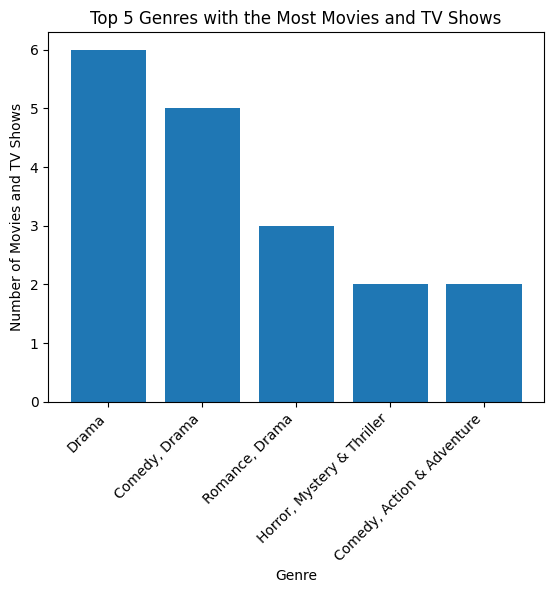

In [ ]:
# Visualize the data

plt.bar(x =Top_5_genres_visulalize.index,height =Top_5_genres_visulalize.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

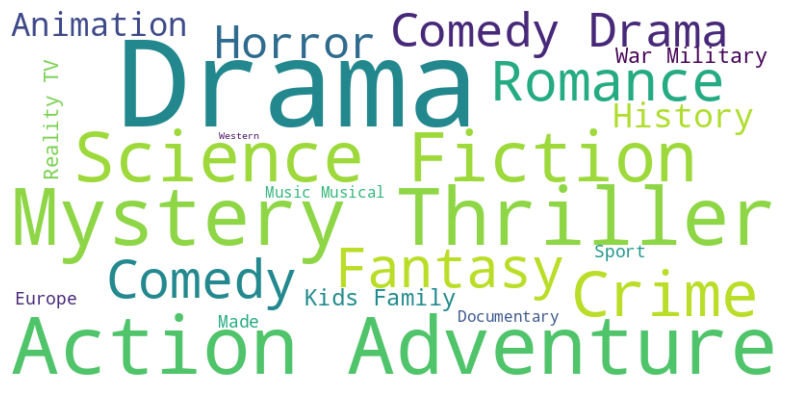

In [ ]:
#Let's Visvalize it using word cloud
all_genres = ' '.join(final_data_df['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
##Counting Streaming Service
Streaming_service_counts = final_data_df['Streaming Provider'].value_counts().sort_values(ascending = False)
Streaming_service_counts


Streaming Provider
Netflix                                                                                         42
Amazon Prime Video                                                                              41
Apple TV                                                                                        24
Hotstar                                                                                         16
NA                                                                                              16
Jio Cinema                                                                                      11
Sony Liv                                                                                         8
Na                                                                                               7
Bookmyshow                                                                                       5
Alt Balaji                                                                                

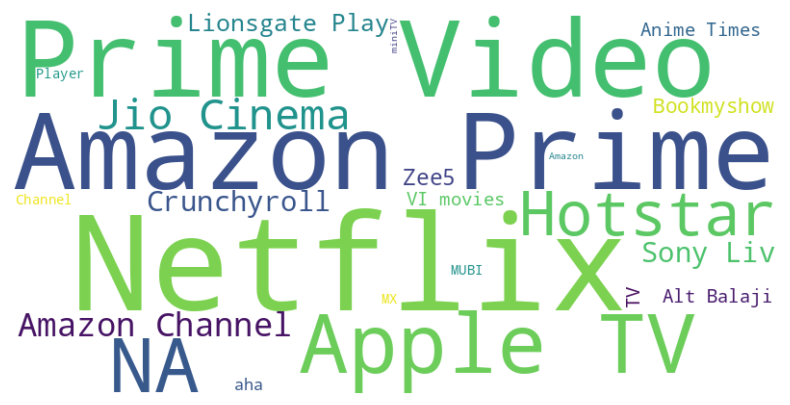

In [ ]:
#Let's Visvalize it using word cloud

all_genres = ' '.join(final_data_df['Streaming Provider'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving Data in csv format
Movies_df.to_csv("Movies Data.csv")
Tv_Shows_df.to_csv("TV Shows Data.csv")

In [ ]:
#saving filter data as Filter Data in csv format
final_data_df.to_csv("Filter Data.csv")

# **Dataset Drive Link (View Access with Anyone) -**
https://drive.google.com/drive/folders/1DAwZ1uy8vzG2YO48vbDHh-UTia3qDQfW?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***